In [15]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings("ignore")
import sklearn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, matthews_corrcoef, median_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, cross_val_predict
import matplotlib.pyplot as plt
from sklearn import model_selection
import time
from sklearn.neural_network import MLPRegressor
import os
from sklearn.preprocessing import LabelEncoder
from time import time
from datetime import datetime
import json
import import_ipynb
from save_lib import save_RF_model
from save_lib import save_NN_model
pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

ImportError: cannot import name 'save_RF_model'

In [14]:
t = None
save_RF_model(t)

NameError: name 'save_RF_model' is not defined

In [100]:
dr = 'exp/prepared/'
file_names = os.listdir(dr)

def lowerstr(f):
    for col in f:
        if '№ партии' in col:
            f['№ партии'] = f['№ партии'].str.lower()
        if '№ плавки' in col:
            f['№ плавки'] = f['№ плавки'].str.lower()
    return f


df_modes = pd.read_excel('merge_table_mean_chem.xlsx')
table_stretching = pd.read_excel(dr+file_names[17])
table_stretching = lowerstr(table_stretching)

In [101]:
table_stretching.shape

(31091, 36)

In [153]:
ls_all = [
    'Поставщик',
    'НД (гост, ту)',
    'ГОСТ, ТУ',
    'Дата форм. цехом',
    'марка стали',
    '№ плавки',
    'кол-во, шт.',
    '№ партии',
    '1 зона по ВТР закалка', 
    '1 зона уставка закалка',
    '1 зона фактическая температура закалка', 
    '2 зона по ВТР закалка',
    '3 зона по ВТР закалка', 
    '3 зона уставка закалка',
    '3 зона фактическая температура закалка',
    'Температура трубы на выгрузке из печи закалки',
    'Скорость прохождения трубы через спрейер, м/с',
    't˚ C трубы после спреера', 
    'Расход воды на закалочный спрейер, м3',
    'время выдержки в закалочной ванне, сек.',
    't˚ C воды в закалочной ванне', 
    't˚ C трубы после ванны',
    '1 зона ВТР и уставка отпуск', 
    '1 зона фактическая температура отпуск',
    '2 зона ВТР и уставка отпуск', 
    '3 зона ВТР и уставка отпуск',
    '3 зона фактическая температура отпуск', 
    '4 зона ВТР и уставка отпуск',
    '5 зона ВТР и уставка отпуск', 
    '5 зона фактическая температура отпуск',
    'Температура трубы на выгрузке из печи отпуска',
    'шаг балок закалочная печь, сек', 
    'шаг балок отпускная печь, сек',
    'диаметр', 
    'толщина стенки', 
    'C', 
    'Mn', 
    'Si', 
    'P', 
    'S',
    'Cr', 
    'Ni', 
    'Cu', 
    'Al', 
    'V', 
    'Ti', 
    'Nb', 
    'Mo', 
    'N', 
    'B',
    'Параметр',
    'Тип предела текучести 0.2',
    'Тип предела текучести 0.5',
    'Тип предела текучести 0.6',
    'C-coef'
]

In [154]:
table_stretching.shape

(31091, 36)

In [155]:
df_merge = pd.merge(df_modes, table_stretching, how ='left', on = ['№ плавки','№ партии'])

chem = {#'Mn': 0, 'Si': 0, 
#         'P': 0, 
#         'Cr': 0, 'Ni': 0, 'Cu': 0, 'Al': 0, 'V': 0, 'Mo': 0, 
        'Ti': 0, 'Nb': 0, 'N': 0.004, 'B': 0.001, 'S': 0}

df_merge = df_merge.fillna(value = chem)

In [156]:
df_merge.shape

(30298, 82)

In [157]:
df_merge['Параметр закалка'] = 1/(1/((df_merge['2 зона по ВТР закалка']+
                                   df_merge['3 зона по ВТР закалка'])/2 + 273)
                                - (2.303*1.986*np.log10(61*df_merge['шаг балок закалочная печь, сек']/3600)/110000))-273
                               

In [158]:
df_merge['Параметр отпуск'] = ((df_merge['2 зона по ВТР закалка']+df_merge['4 зона ВТР и уставка отпуск']+df_merge['5 зона фактическая температура отпуск'])/3
                        + 273)*(20+np.log(94*df_merge['шаг балок отпускная печь, сек']/3600))*1e-3

In [159]:
df_merge['Тип предела текучести (1186)'] = df_merge['Тип предела текучести (1186)'].apply(lambda x: str(x))

In [160]:
# df_merge = df_merge[df_merge['Врем. сопротивление'] != '']
# df_merge = df_merge[df_merge['Предел текучести'] != '']
df_merge = df_merge[df_merge['t˚ C трубы после спреера'] != ' ']

In [161]:
df_merge.shape

(30289, 84)

In [162]:
df_merge.head()

,№ плавки,№ партии,"НД (гост, ту)",марка стали,"кол-во, шт.",1 зона по ВТР закалка,1 зона уставка закалка,1 зона фактическая температура закалка,2 зона по ВТР закалка,3 зона по ВТР закалка,3 зона уставка закалка,3 зона фактическая температура закалка,Температура трубы на выгрузке из печи закалки,"Скорость прохождения трубы через спрейер, м/с",t˚ C трубы после спреера,"Расход воды на закалочный спрейер, м3","время выдержки в закалочной ванне, сек.",t˚ C воды в закалочной ванне,t˚ C трубы после ванны,1 зона ВТР и уставка отпуск,1 зона фактическая температура отпуск,2 зона ВТР и уставка отпуск,3 зона ВТР и уставка отпуск,3 зона фактическая температура отпуск,4 зона ВТР и уставка отпуск,5 зона ВТР и уставка отпуск,5 зона фактическая температура отпуск,Температура трубы на выгрузке из печи отпуска,"шаг балок закалочная печь, сек","шаг балок отпускная печь, сек",диаметр,толщина стенки,Поставщик,C,Mn,Si,P,S,Cr,Ni,Cu,Al,V,Ti,Nb,Mo,N,B,Тип предела текучести (1186),Дата форм. цехом,№ заявки,"ГОСТ, ТУ",Гр. прочн.,Марка стали,Диаметр,Стенка,Предел текучести (1027),Относительное удлинение (1099),Врем. сопротивление (1042),Отношение (1118),Относительное сужение (1016),Предел текучести (1141),Врем. сопротивление (1140),Диаметр образца (1225),Толщина (1226),min Предел текучести (1027),max Предел текучести (1027),min Относительное удлинение (1099),min Врем. сопротивление (1042),max Врем. сопротивление (1042),max Отношение (1118),"Предел текучести, Ksi (1145)","Врем. сопротивление, Ksi (1146)","Предел текучести, кгс/мм2","Врем. сопротивление, кгс/мм2","Предел текучести, Н/мм2 или МПа","Врем. сопротивление, Н/мм2 или МПа","Предел текучести , кгс/мм2","Врем. сопротивление , кгс/мм2","Тип предела текучести, Н/мм2 или МПа",Врем. сопротивление,Предел текучести,Параметр закалка,Параметр отпуск
0,10034,305311,ТУ 3,38Г2С,50,860.0,860.0,861.0,860.0,870.0,853.0,853.0,861.0,1.0,NaN,116.0,NaN,27.0,NaN,605.0,604.0,605.0,597.0,599.0,597.0,584.0,584.0,582.0,30.0,30.0,73.00,5.5,"АО ""ОЭМК""",0.38,1.72,0.49,0.011,0.009,0.06,0.03,0.04,NaN,NaN,0.0000,0.0,NaN,0.004,0.001,0.2,27.05.2013,431972.0,ГОСТ 633-80 Исполнение А,Д,38Г2С,73.00,5.5,40.0,26.5,76.5,0.52,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.5,40.0,849.393849,18.833866
1,10035,305309,ТУ 3,38Г2С,50,860.0,860.0,865.0,860.0,870.0,853.0,852.0,861.0,1.0,NaN,117.0,NaN,27.0,NaN,605.0,607.0,605.0,597.0,596.0,597.0,584.0,585.0,582.0,30.0,30.0,73.00,5.5,"АО ""ОЭМК""",0.39,1.64,0.46,0.009,0.006,0.05,0.03,0.07,NaN,NaN,0.0000,0.0,NaN,0.004,0.001,0.2,27.05.2013,431968.0,ГОСТ 633-80 Исполнение А,Д,38Г2С,73.00,5.5,39.0,24.0,78.0,0.50,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0,39.0,849.393849,18.840451
2,10043,202198,ту78,30Г2,20,890.0,890.0,891.0,890.0,900.0,900.0,901.0,898.0,1.0,NaN,1813.0,30.0,23.0,25.0,520.0,522.0,525.0,517.0,515.0,522.0,517.0,517.0,524.0,39.0,39.0,107.95,14.0,"АО ""ОЭМК""",0.28,1.32,0.25,0.008,0.007,0.05,0.03,0.04,0.027,0.002,0.0012,0.0,0.007,0.004,0.001,0.2,15.02.2012,407998.0,ГОСТ 633-80,Л,30Г2,107.95,14.0,71.5,16.5,86.5,0.83,65.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.5,71.5,884.883303,18.336641
3,10043,402040,ТУ 78,30Г2,15,900.0,900.0,900.0,900.0,910.0,908.0,908.0,895.0,1.0,NaN,37.0,NaN,23.0,42.5,570.0,569.0,570.0,564.0,563.0,564.0,555.0,555.0,558.0,36.0,36.0,107.95,14.0,"АО ""ОЭМК""",0.28,1.32,0.25,0.008,0.007,0.05,0.03,0.04,0.027,0.002,0.0012,0.0,0.007,0.004,0.001,0.2,03.02.2014,442750.0,ГОСТ 633-80 Исполнение А,К,30Г2,107.95,14.0,65.0,20.0,81.0,0.80,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.0,65.0,892.742550,18.861466
4,10050,305312,ТУ 3,38Г2С,28,860.0,860.0,861.0,860.0,870.0,853.0,853.0,860.0,1.0,NaN,116.0,NaN,27.0,NaN,605.0,606.0,605.0,597.0,596.0,597.0,584.0,583.0,582.0,30.0,30.0,73.00,5.5,"АО ""ОЭМК""",0.37,1.67,0.51,0.013,0.007,0.05,0.03,0.04,NaN,NaN,0.0000,0.0,NaN,0.004,0.001,0.2,27.05.2013,431974.0,ГОСТ 633-80 Исполнение А,Д,

In [163]:
ls_type = [
    'Тип предела текучести 0.2',
    'Тип предела текучести 0.5',
    'Тип предела текучести 0.6',
    'del'
]
df_merge[ls_type] = pd.get_dummies(df_merge['Тип предела текучести (1186)'])

In [164]:
ls_steel = pd.get_dummies(df_merge['марка стали']).columns
ls_steel = list(ls_steel)

In [165]:
len(ls_steel)

66

In [166]:
df_merge[ls_steel] = pd.get_dummies(df_merge['марка стали'])

In [167]:
df_merge.shape

(30289, 154)

In [168]:
df_merge = df_merge.reset_index(drop=True)

In [169]:
df_merge.head()

,№ плавки,№ партии,"НД (гост, ту)",марка стали,"кол-во, шт.",1 зона по ВТР закалка,1 зона уставка закалка,1 зона фактическая температура закалка,2 зона по ВТР закалка,3 зона по ВТР закалка,3 зона уставка закалка,3 зона фактическая температура закалка,Температура трубы на выгрузке из печи закалки,"Скорость прохождения трубы через спрейер, м/с",t˚ C трубы после спреера,"Расход воды на закалочный спрейер, м3","время выдержки в закалочной ванне, сек.",t˚ C воды в закалочной ванне,t˚ C трубы после ванны,1 зона ВТР и уставка отпуск,1 зона фактическая температура отпуск,2 зона ВТР и уставка отпуск,3 зона ВТР и уставка отпуск,3 зона фактическая температура отпуск,4 зона ВТР и уставка отпуск,5 зона ВТР и уставка отпуск,5 зона фактическая температура отпуск,Температура трубы на выгрузке из печи отпуска,"шаг балок закалочная печь, сек","шаг балок отпускная печь, сек",диаметр,толщина стенки,Поставщик,C,Mn,Si,P,S,Cr,Ni,Cu,Al,V,Ti,Nb,Mo,N,B,Тип предела текучести (1186),Дата форм. цехом,...,18ХМФБ,18ХМФБ-в2,20,20А,20А-1,20А-У,20А-пр,20Г2,20Г2-1,20ФА,20ХМФА,20ХФА,26Г1ФМ,30Г2,30Г2,30Г2-2,30Г2-3,30Г2-5,30Г2-8,30Г2Ф,30Г3,30ХГМА,30ХГМА-1,30ХГМА-4,30ХГСА,30ХМА,32Г1,32Г2,32Г2СФБ,32Х1МФ,32Х1МФ-1,32ХА,32ХГ,32ХНМ,35ХМФA,36ХГ2СФБ,36ХГФ,37Г2С,37Г2Ф,37Г2Ф-М,38Г2-4,38Г2С,38Г2С-1,38Г2С-3,38Г2С-4,38Г2С-9,38Г2С-В,38Г2СФ,Д,ДБ
0,10034,305311,ТУ 3,38Г2С,50,860.0,860.0,861.0,860.0,870.0,853.0,853.0,861.0,1.0,NaN,116.0,NaN,27.0,NaN,605.0,604.0,605.0,597.0,599.0,597.0,584.0,584.0,582.0,30.0,30.0,73.00,5.5,"АО ""ОЭМК""",0.38,1.72,0.49,0.011,0.009,0.06,0.03,0.04,NaN,NaN,0.0000,0.0,NaN,0.004,0.001,0.2,27.05.2013,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,10035,305309,ТУ 3,38Г2С,50,860.0,860.0,865.0,860.0,870.0,853.0,852.0,861.0,1.0,NaN,117.0,NaN,27.0,NaN,605.0,607.0,605.0,597.0,596.0,597.0,584.0,585.0,582.0,30.0,30.0,73.00,5.5,"АО ""ОЭМК""",0.39,1.64,0.46,0.009,0.006,0.05,0.03,0.07,NaN,NaN,0.0000,0.0,NaN,0.004,0.001,0.2,27.05.2013,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,10043,202198,ту78,30Г2,20,890.0,890.0,891.0,890.0,900.0,900.0,901.0,898.0,1.0,NaN,1813.0,30.0,23.0,25.0,520.0,522.0,525.0,517.0,515.0,522.0,517.0,517.0,524.0,39.0,39.0,107.95,14.0,"АО ""ОЭМК""",0.28,1.32,0.25,0.008,0.007,0.05,0.03,0.04,0.027,0.002,0.0012,0.0,0.007,0.004,0.001,0.2,15.02.2012,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,10043,402040,ТУ 78,30Г2,15,900.0,900.0,900.0,900.0,910.0,908.0,908.0,895.0,1.0,NaN,37.0,NaN,23.0,42.5,570.0,569.0,570.0,564.0,563.0,564.0,555.0,555.0,558.0,36.0,36.0,107.95,14.0,"АО ""ОЭМК""",0.28,1.32,0.25,0.008,0.007,0.05,0.03,0.04,0.027,0.002,0.0012,0.0,0.007,0.004,0.001,0.2,03.02.2014,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,10050,305312,ТУ 3,38Г2С,28,860.0,860.0,861.0,860.0,870.0,853.0,853.0,860.0,1.0,NaN,116.0,NaN,27.0,NaN,605.0,606.0,605.0,597.0,596.0,597.0,584.0,583.0,582.0,30.0,30.0,73.00,5.5,"АО ""ОЭМК""",0.37,1.67,0.51,0.013,0.007,0.05,0.03,0.04,NaN,NaN,0.0000,0.0,NaN,0.004,0.001,0.2,27.05.2013,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [170]:
df_merge = df_merge[df_merge['Cr'] < 10]

In [171]:
df_merge['C-coef'] = ((df_merge['C'] + df_merge['Mn'])/6.0 + (df_merge['Cr'] + df_merge['Mo'] + df_merge['V'])/5.0 +
                        (df_merge['Ni'] + df_merge['Cu'])/15.0)

In [172]:
df_merge.shape

(30237, 155)

In [173]:
df_merge.to_excel('prepared_hard.xlsx')

PermissionError: [Errno 13] Permission denied: 'prepared_hard.xlsx'

In [2]:
df_merge = pd.read_excel('prepared_hard.xlsx')
df_merge.shape

(30237, 155)

In [3]:
ls_need_col = [
#     'Поставщик',
#     'НД (гост, ту)',
#     'ГОСТ, ТУ',
#     'Дата форм. цехом',
#      'марка стали',
#     '№ плавки',
#     'кол-во, шт.',
#     '№ партии',
#     '1 зона по ВТР закалка', 
#     '1 зона уставка закалка',
#     '1 зона фактическая температура закалка', 
#     '2 зона по ВТР закалка',
#     '3 зона по ВТР закалка', 
#     '3 зона уставка закалка',
#     '3 зона фактическая температура закалка',
#     'Температура трубы на выгрузке из печи закалки',
    'Скорость прохождения трубы через спрейер, м/с',
    't˚ C трубы после спреера', 
#     'Расход воды на закалочный спрейер, м3',
#     'время выдержки в закалочной ванне, сек.',
#     't˚ C воды в закалочной ванне', 
#     't˚ C трубы после ванны',
#     '1 зона ВТР и уставка отпуск', 
    '1 зона фактическая температура отпуск',
    '2 зона ВТР и уставка отпуск', 
#     '3 зона ВТР и уставка отпуск',
    '3 зона фактическая температура отпуск', 
    '4 зона ВТР и уставка отпуск',
#     '5 зона ВТР и уставка отпуск', 
    '5 зона фактическая температура отпуск',
    'Температура трубы на выгрузке из печи отпуска',
    'шаг балок закалочная печь, сек', 
    'шаг балок отпускная печь, сек',
    'диаметр', 
    'толщина стенки', 
    'C', 
    'Mn', 
    'Si', 
    'P', 
#     'S',
    'Cr', 
    'Ni', 
    'Cu', 
    'Al', 
#     'V', 
#     'Ti', 
#     'Nb', 
#     'Mo', 
    'N', 
#     'B',
    'Параметр отпуск',
    'Параметр закалка',
#     'Тип предела текучести 0.2',
#     'Тип предела текучести 0.5',
#     'Тип предела текучести 0.6',
    'C-coef'
]

df_prepared_merge = pd.DataFrame()

for col in ls_need_col+['Предел текучести', 'Врем. сопротивление']: #ls_steel
    df_prepared_merge[col] = df_merge[col]

In [101]:
# df_prepared_merge['НД (гост, ту)'] = df_prepared_merge['НД (гост, ту)'].apply(lambda x: str(x))

In [102]:
label = LabelEncoder()  
# print(df_prepared_merge['марка стали'])
# df_prepared_merge['марка стали'] = label.fit_transform(df_prepared_merge['марка стали'])
# df_prepared_merge['НД (гост, ту)'] = label.fit_transform(df_prepared_merge['НД (гост, ту)'])
# print(df_prepared_merge['марка стали'])

In [103]:
# df_prepared_merge = df_prepared_merge[df_prepared_merge['t˚ C трубы после спреера'] != ' ']

In [4]:
df_prepared_merge = df_prepared_merge.dropna()
df_prepared_merge.shape

(15892, 26)

In [5]:
# Посмотреть все ли в кгс (если max чуть больше 100, то все ок, если 800 или больше у нас конкретные проблемы)
print(df_prepared_merge['Предел текучести'].describe())
print(df_prepared_merge['Врем. сопротивление'].describe())

count    15892.000000
mean        64.541301
std         11.361122
min         25.000000
25%         62.304661
50%         66.740426
75%         70.500000
max        116.000000
Name: Предел текучести, dtype: float64
count    15892.000000
mean        74.645818
std          9.815652
min         38.500000
25%         72.603794
50%         76.000000
75%         79.792794
max        124.000000
Name: Врем. сопротивление, dtype: float64


In [106]:
import seaborn as sns

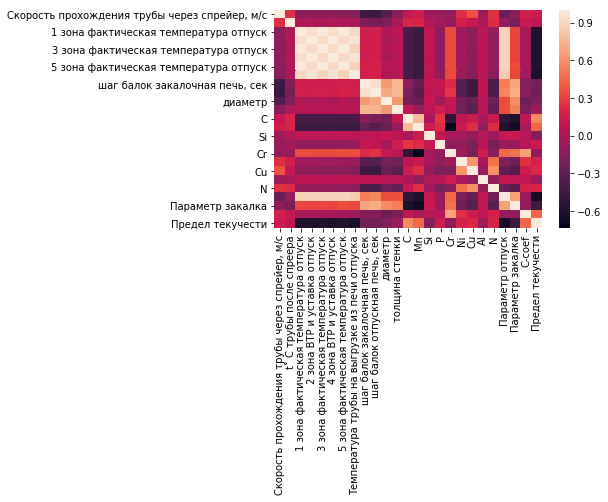

In [107]:
corr_matrix = df_merge[ls_need_col+['Предел текучести']].corr()
sns_corr = sns.heatmap(corr_matrix).get_figure()
sns_corr.savefig('corr_прочность.png')

In [6]:
df_prepared_merge = df_prepared_merge.reset_index(drop=True)

In [7]:
df_prepared_merge.shape

(15892, 26)

In [8]:
y = pd.DataFrame()
X = pd.DataFrame()

target = 'Предел текучести'
# target = 'Врем. сопротивление'

y[target] = df_prepared_merge[target]


for i in ls_need_col: #+ls_steel:
    X[i] = df_prepared_merge[i]

In [111]:
X['C'].describe()

count    15892.000000
mean         0.248092
std          0.060691
min          0.050000
25%          0.190000
50%          0.280000
75%          0.290000
max          0.400000
Name: C, dtype: float64

In [112]:
X['C'].value_counts().index

Float64Index([  0.28,   0.29,   0.27,    0.3,   0.17,   0.14,   0.31,   0.18,
                0.15,   0.16,
              ...
               0.212,  0.185,  0.278, 0.2895,  0.186,  0.197,  0.279,  0.178,
               0.292,  0.183],
             dtype='float64', length=151)

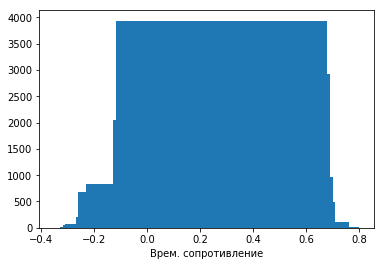

In [113]:
# for col in X:
#     x = X[col].value_counts().index
#     y = X[col].value_counts().values
#     plt.bar(x, y)
#     plt.xlabel(col)
#     plt.show()



# Хотела посмотреть что не так с осью и подписями на ней
x = X['C'].value_counts().index
y = X['C'].value_counts().values
plt.bar(x, y)
plt.xlabel(col)
plt.show()

# x = X['C'].value_counts().index
# y = X['C'].value_counts().values
# plt.bar(x, y)
# plt.xlabel('C')
# plt.show()
# X['C'].describe()

In [114]:
# for col in y:
#     xp = y[col].value_counts().index
#     yp = y[col].value_counts().values
#     plt.bar(xp, yp)
#     plt.xlabel(col)
#     plt.show()

In [115]:
tmp = pd.DataFrame()
# for col in X.columns[:1]:
tmp = X[X['2 зона по ВТР закалка'] != (np.median(X['2 зона по ВТР закалка'])+50)]
for col in tmp:
    x = tmp[col].value_counts().index
    y = tmp[col].value_counts().values
    plt.bar(x, y)
    plt.xlabel(col)
    plt.show()

KeyError: '2 зона по ВТР закалка'

In [116]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=7)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

In [148]:
np.array(y).reshape(19545,)

array([ 77.5       ,  47.        ,  44.5       , ...,  67.40324168,
        67.5052133 ,  67.09732681])

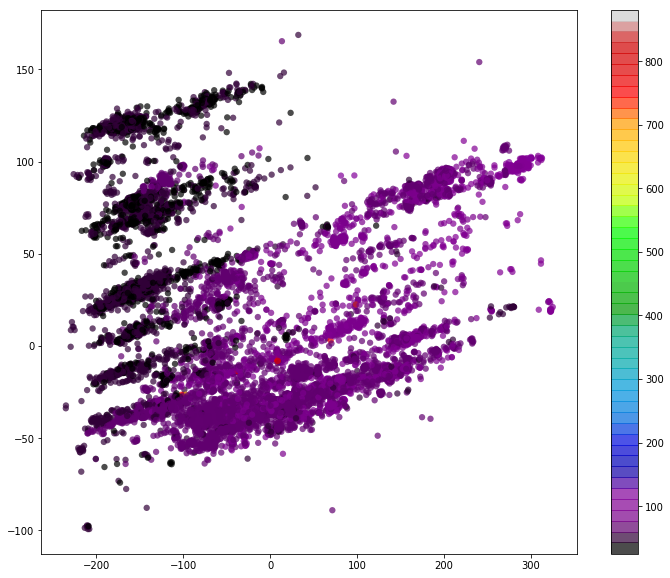

In [178]:
pca = decomposition.PCA(n_components=7)
X_reduced = pca.fit_transform(X)
plt.figure(figsize=(12,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=np.array(y).reshape(19545,),
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 50))
plt.colorbar()
plt.show()

In [163]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=17)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=np.array(y).reshape(19545,), 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

KeyboardInterrupt: 

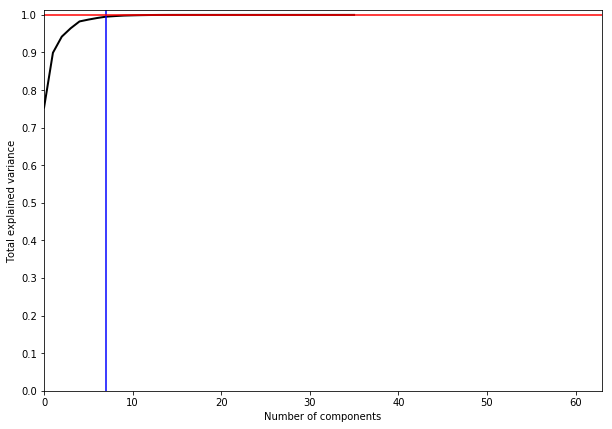

In [177]:
pca = decomposition.PCA().fit(X)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(7, c='b')
plt.axhline(1, c='r')
plt.show();

In [9]:
scalerx = StandardScaler()  

X = scalerx.fit_transform(X, y)

In [10]:
print(X.shape,y.shape)

(15892, 24) (15892, 1)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((12713, 24), (12713, 1), (3179, 24), (3179, 1))

In [13]:
rfc = RandomForestRegressor(max_features = 10, max_depth = 15, min_samples_leaf = 2, n_estimators=500, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
scr = rfc.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
corr = np.corrcoef(y_test.T, y_pred)
print(scr, mae, mse, corr)


# Сохраняем информацию о качестве модели
score_data = {
    'r square':[scr],
    'MAE':[mae],
    'MSE':[mse],
    'corr':[corr[0][1]]
}
score_df = pd.DataFrame(data = score_data)
# score_df

# Вызов метода из скрипта save_lib который создает папку в MODEL_RF 
# с текущим временем и сохраняет туда всю информацию по модели и саму модель
save_RF_model(rfc)

0.9046817022216298 2.4260318264226544 12.290867197531934 [[1.         0.95115345]
 [0.95115345 1.        ]]


NameError: name 'save_RF_model' is not defined

In [194]:
# rfc.feature_importances_

In [261]:
etr = ExtraTreesRegressor()
etr.fit(X_train, y_train)
print(etr.feature_importances_)

[ 0.01848971  0.03111876  0.00835532  0.01986143  0.02304624  0.12952694
  0.04128201  0.00451202  0.0077717   0.03379755  0.01698785  0.13996274
  0.01961548  0.00716181  0.00457426  0.06977579  0.01041504  0.0072573
  0.00449231  0.0058181   0.08507282  0.18656671  0.12453812]


In [272]:
etr.predict(df)*9.8

array([ 483.70101681,  503.0046679 ,  503.0046679 ])

In [295]:
tmp = pd.DataFrame()
for col in ls_need_col: #+ls_steel:
    tmp[col] = df_prepared_merge[col]

In [296]:
len(etr.feature_importances_), len(tmp.columns)

(23, 23)

In [297]:
a = sorted(zip(rfc.feature_importances_, tmp.columns))

In [298]:
for i, j in a:
    print(i,j)

0.00228035156604 Al
0.00238526572507 P
0.00350593131307 N
0.00352298498904 Cu
0.00402206014624 шаг балок отпускная печь, сек
0.00408896205422 шаг балок закалочная печь, сек
0.00481180924814 толщина стенки
0.00602621039588 Скорость прохождения трубы через спрейер, м/с
0.0066218952652 Si
0.00673903011994 Ni
0.0109508449355 t˚ C трубы после спреера
0.0127576161556 диаметр
0.0163818015459 1 зона фактическая температура отпуск
0.0166880658277 Mn
0.0198121772793 1 зона фактическая температура закалка
0.0237261663821 Температура трубы на выгрузке из печи закалки
0.0304039196788 Cr
0.0383194766529 Температура трубы на выгрузке из печи отпуска
0.0515478612114 Параметр закалка
0.0732560474411 2 зона ВТР и уставка отпуск
0.12386828868 Параметр отпуск
0.181511037743 C
0.356772195644 C-coef


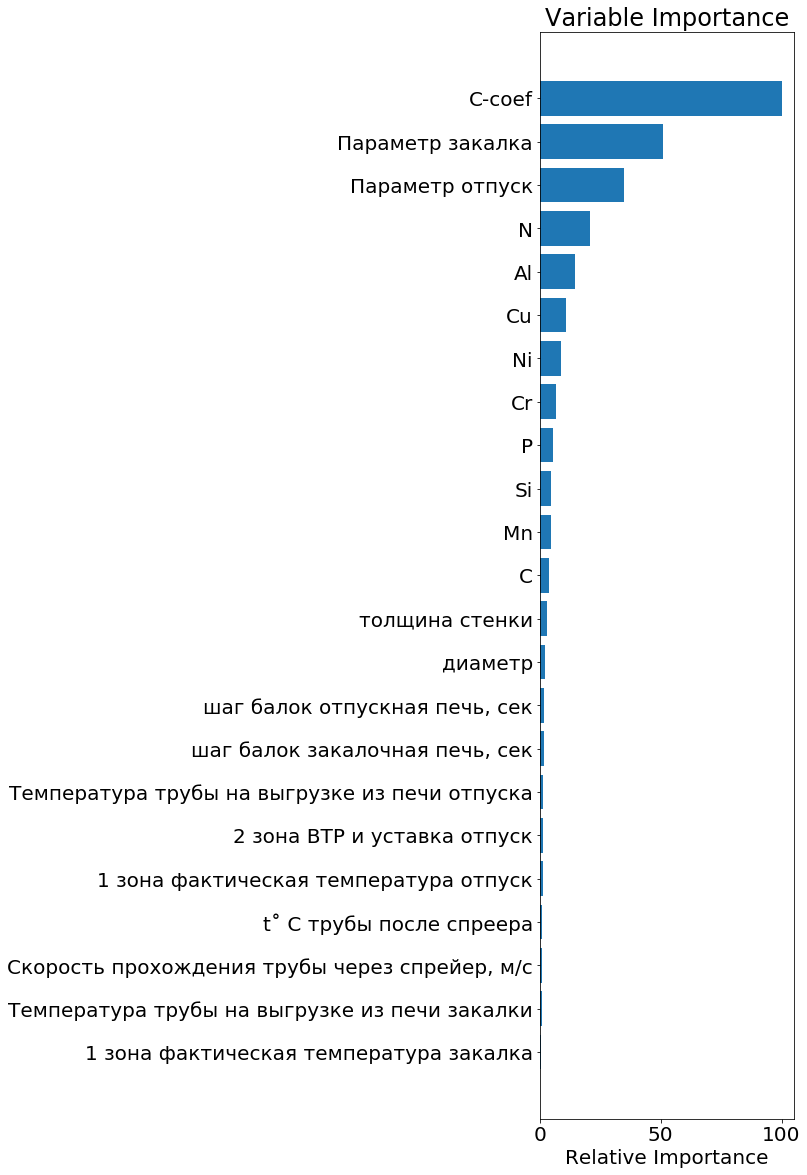

In [299]:
import matplotlib.pyplot as plt
%matplotlib inline


# plt.scatter(etr.feature_importances_, tmp.columns)

feature_importance = rfc.feature_importances_
#увеличим дефолтный размер графиков
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 20
rcParams.update({'font.size': 20})

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 2
plt.subplot(1, 2, 2)
plt.barh(pos,feature_importance[sorted_idx], align='center')
plt.yticks(pos, tmp.columns)
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig('feature_importance.jpg')
plt.show()


In [228]:
a = sorted(zip(fit.ranking_, tmp.columns))
for i, j in a:
    print(i,j)

1 C-coef
1 Параметр
1 шаг балок закалочная печь, сек
2 Cu
3 1 зона фактическая температура отпуск
4 C
5 t˚ C трубы после спреера
6 2 зона ВТР и уставка отпуск
7 3 зона уставка закалка
8 V
9 Температура трубы на выгрузке из печи отпуска
10 N
11 Si
12 Mn
13 1 зона уставка закалка
14 Nb
15 Скорость прохождения трубы через спрейер, м/с
16 толщина стенки
17 Cr
18 P
19 Ni
20 S
21 диаметр
22 шаг балок отпускная печь, сек
23 Mo
24 Ti
25 Al
26 B


In [232]:
from sklearn.feature_selection import RFE

etr = ExtraTreesRegressor()

rfe = RFE(etr, 3, verbose=1)

fit = rfe.fit(X_train, y_train)

print(fit.n_features_)

print(fit.support_)

print(fit.ranking_)

Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
3
[False False False False False False False  True False False False False
 False False False False False 

In [225]:
print(fit.n_features_)
print(fit.support_)
print(fit.ranking_)

3
[False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False  True  True]
[13  7 15  5  3  6  9  1 22 21 16  4 12 11 18 20 17 19  2 25  8 24 14 23 10
 26  1  1]


In [276]:
# cv = cross_val_score(rfc, X, y, cv=5, scoring = 'neg_median_absolute_error')

In [277]:
# np.mean(cv)

In [305]:
# predicted = cross_val_predict(rfc, X, y, cv=5)

In [306]:
# mae = mean_absolute_error(y, predicted)
# mae

In [155]:
mae*9.8

29.316895263172619

In [273]:
'''
Подбор параметров деревьев решений
'''
from sklearn.model_selection import GridSearchCV

tree = RandomForestRegressor()

tree_params = {'max_depth': range(5,15, 5),'max_features': range(10,20),  
               'min_samples_leaf': range(1,4), 'n_estimators': range(100,1000, 300)}

tree_grid = GridSearchCV(tree, tree_params,cv=5, verbose = True, n_jobs=-1)

tree_grid.fit(X_train, y_train)
y_pred_grid = tree_grid.predict(X_test)
print(tree_grid.best_params_)
print(tree_grid.best_score_)
print(mean_absolute_error(y_test, y_pred_grid))

Fitting 5 folds for each of 180 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed: 17.2min finished


{'max_depth': 10, 'max_features': 13, 'min_samples_leaf': 1, 'n_estimators': 400}
0.898387465771
2.49103460966


In [337]:
d = {
#     'НД (гост, ту)' : [ ]
#     'марка стали' : [35, 52, 27], #'30ХГМА', '37Г2Ф', '30Г2'
#     '1 зона фактическая температура закалка' : [860, 840, 850], 
#     '2 зона по ВТР закалка' : [860, 840, 850],
#     '3 зона по ВТР закалка' : [860, 850, 860], 
#     'Температура трубы на выгрузке из печи закалки' : [855, 835, 850],
    'Скорость прохождения трубы через спрейер, м/с' : [0.15, 0.28, 0.37],
    't˚ C трубы после спреера' : [106, 100, 75],
    '1 зона ВТР и уставка отпуск' : [675, 664, 600], 
    '2 зона ВТР и уставка отпуск' : [675, 664, 600], 
    '3 зона ВТР и уставка отпуск' : [650, 653, 593],
    '4 зона ВТР и уставка отпуск' : [650, 653, 593],
    '5 зона ВТР и уставка отпуск' : [633, 637, 580], 
    'Температура трубы на выгрузке из печи отпуска' : [660, 660, 575],
    'шаг балок закалочная печь, сек' : [37, 40, 30], 
    'шаг балок отпускная печь, сек' : [37, 31, 30],
    'диаметр' : [187.71, 88.9, 168.28], 
    'толщина стенки' : [16.5, 12.2, 8.94], 
    'C' : [0.29, 0.37, 0.28], 
    'Mn' : [0.92, 1.49, 1.33], 
    'Si' : [0.26, 0.28, 0.26], 
    'P' : [0.009, 0.011, 0.009], 
#     'S' : [0.005, 0.007, 0.007],
    'Cr' : [0.68, 0.14, 0.1], 
    'Ni' : [0.13, 0.13, 0.13], 
    'Cu' : [0.15, 0.13, 0.19], 
    'Al' : [0.03, 0.03, 0.03], 
#     'V' : [0.007, 0.09, 0.005], 
#     'Ti' : [0, 0.006, 0.007], 
#     'Nb' : [0, 0.0002, 0.006], 
#     'Mo' : [0.16, 0.0009, 0.015], 
    'N' : [0.008, 0.006, 0.009], 
#     'B': [0, 0, 0.0005],
    'Параметр отпуск' : [25.826798, 25.757751, 24.078837],
    'Параметр закалка' : [849.279448, 836.289772, 839.665069],
#     'Тип предела текучести 0.2': [1, 1, 1],
#     'Тип предела текучести 0.5': [0, 0, 0],
#     'Тип предела текучести 0.6': [0, 0, 0],
    'C-coef': [0.39, 0.37, 0.31],
#     '08ХГМФБ': [0, 0, 0],
#     '08ХГФБ': [0, 0, 0],
#     '09Г2С': [0, 0, 0],
#     '09ГФБ': [0, 0, 0],
#     '10Г2': [0, 0, 0],
#     '10Х1МФБ': [0, 0, 0],
#     '12ГА': [0, 0, 0],
#     '12ГФ': [0, 0, 0],
#     '13ГФА': [0, 0, 0],
#     '13ХФА': [0, 0, 0],
#     '13ХФА-3': [0, 0, 0],
#     '13ХФА-4': [0, 0, 0],
#     '15Х5МФБЧ': [0, 0, 0],
#     '18ГФ': [0, 0, 0],
#     '18Х3МФБ': [0, 0, 0],
#     '18ХГТ': [0, 0, 0],
#     '18ХМФБ': [0, 0, 0],
#     '18ХМФБ-в2': [0, 0, 0],
#     '20': [0, 0, 0],
#     '20А': [0, 0, 0],
#     '20А-1': [0, 0, 0],
#     '20А-У': [0, 0, 0],
#     '20А-пр': [0, 0, 0],
#     '20Г2': [0, 0, 0],
#     '20Г2-1': [0, 0, 0],
#     '20ФА': [0, 0, 0],
#     '20ХМФА': [0, 0, 0],
#     '20ХФА': [0, 0, 0],
#     '26Г1ФМ': [0, 0, 0],
#     '30Г2': [0, 0, 1],
#     '30Г2 ': [0, 0, 0],
#     '30Г2-2': [0, 0, 0],
#     '30Г2-3': [0, 0, 0],
#     '30Г2-5': [0, 0, 0],
#     '30Г2-8': [0, 0, 0],
#     '30Г2Ф': [0, 0, 0],
#     '30Г3': [0, 0, 0],
#     '30ХГМА': [1, 0, 0],
#     '30ХГМА-1': [0, 0, 0],
#     '30ХГМА-4': [0, 0, 0],
#     '30ХГСА': [0, 0, 0],
#     '30ХМА': [0, 0, 0],
#     '32Г1': [0, 0, 0],
#     '32Г2': [0, 0, 0],
#     '32Г2СФБ': [0, 0, 0],
#     '32Х1МФ': [0, 0, 0],
#     '32Х1МФ-1': [0, 0, 0],
#     '32ХА': [0, 0, 0],
#     '32ХГ': [0, 0, 0],
#     '32ХНМ': [0, 0, 0],
#     '35ХМФA': [0, 0, 0],
#     '36ХГ2СФБ': [0, 0, 0],
#     '36ХГФ': [0, 0, 0],
#     '37Г2С': [0, 0, 0],
#     '37Г2Ф': [0, 1, 0],
#     '37Г2Ф-М': [0, 0, 0],
#     '38Г2-4': [0, 0, 0],
#     '38Г2С': [0, 0, 0],
#     '38Г2С-1': [0, 0, 0],
#     '38Г2С-3': [0, 0, 0],
#     '38Г2С-4': [0, 0, 0],
#     '38Г2С-9': [0, 0, 0],
#     '38Г2С-В': [0, 0, 0],
#     '38Г2СФ': [0, 0, 0],
#     'Д': [0, 0, 0],
#     'ДБ': [0, 0, 0]
}

df = pd.DataFrame(data = d)

In [346]:
time()

1522057298.1167452

In [338]:
import pickle

s = pickle.dumps(rfc)
rfc2 = pickle.loads(s)
y = rfc2.predict(df)
print(y*9.8)

[ 579.39271318  580.72972999  580.72762136]


In [339]:
y[0]

59.121705426057488

In [323]:
s = pickle.dumps(tree_grid)
rfc2 = pickle.loads(s)
y = rfc2.predict(df)
print(y*9.8)

ValueError: Number of features of the model must match the input. Model n_features is 23 and input n_features is 21 

In [96]:
import theano

RuntimeError: To use MKL 2018 with Theano you MUST set "MKL_THREADING_LAYER=GNU" in your environement.

In [91]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization

kfold = model_selection.KFold(n_splits=5, random_state=17)

model = Sequential()
model.add(Dense(units=3, input_dim=X.shape[1]))
model.add(Activation('sigmoid'))
# model.add(Dropout(0.3))
# model.add(Dense(units=4))
# model.add(Activation('tanh'))
# model.add(Dropout(0.4))
# model.add(Dense(units=4))
# model.add(Activation('sigmoid'))

model.add(Dense(units=1))

model.compile(
    loss=keras.losses.mean_squared_error,
    # loss=keras.losses.mean_absolute_error,
    metrics=[keras.metrics.mean_absolute_error],
    optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.5, decay=1e-1)
    )

model.fit(X_train, y_train, batch_size = 512, epochs=500)

# cv_results = model_selection.cross_val_score(svr,X_train, np.ravel(y_train), cv=kfold, scoring='r2')

Using Theano backend.


ModuleNotFoundError: No module named 'theano'

In [341]:
y_predict = model.predict(X_test)
mae = mean_absolute_error(y_predict, y_test)
print(mae)

3.62935857013


In [89]:
# '''
# Запись модели в файл, нейронки

# '''

# model.save('kerasNN '+ str(datetime.now().hour) +'_' + str(datetime.now().minute) + '.h5')
# y = model.predict(df)
# print(y*9.8)

NameError: name 'model' is not defined

In [343]:
from keras.models import load_model

test = load_model('kerasNN 715 715 651.h5')
y = test.predict(df)
print(y*9.8)

ValueError: Error when checking : expected dense_29_input to have shape (36,) but got array with shape (24,)

In [307]:
import pydot
import graphviz

ModuleNotFoundError: No module named 'graphviz'

In [21]:
from keras.utils import plot_model

plot_model(model)

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [325]:
df_prepared_merge.columns

Index(['марка стали', '1 зона фактическая температура закалка',
       '3 зона фактическая температура закалка',
       'Температура трубы на выгрузке из печи закалки',
       'Скорость прохождения трубы через спрейер, м/с',
       '1 зона фактическая температура отпуск',
       '3 зона фактическая температура отпуск',
       '5 зона фактическая температура отпуск',
       'Температура трубы на выгрузке из печи отпуска',
       'шаг балок закалочная печь, сек', 'шаг балок отпускная печь, сек',
       'диаметр', 'толщина стенки', 'C', 'Mn', 'Si', 'P', 'S', 'Cr', 'Ni',
       'Cu', 'Al', 'V', 'Ti', 'Nb', 'Mo', 'N', 'B', 'Параметр', 'C-coef',
       'Предел текучести', 'Врем. сопротивление'],
      dtype='object')

In [327]:
len(df_prepared_merge['марка стали'].value_counts())

50

In [8]:
df_prepared_merge.columns[:2]

Index(['марка стали', '1 зона фактическая температура закалка'], dtype='object')

марка стали


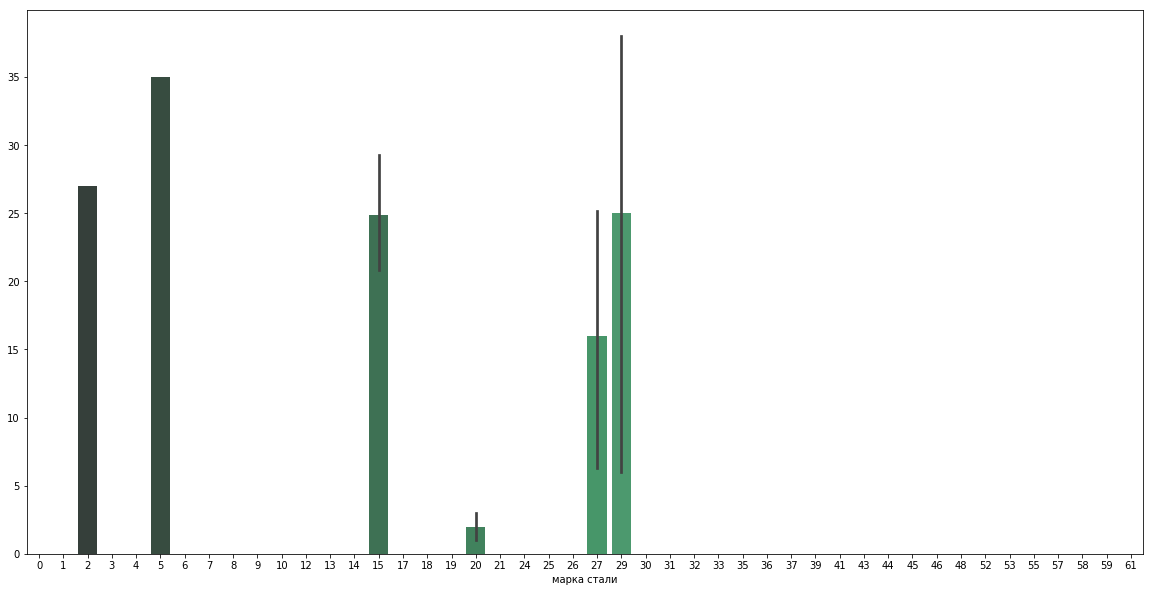

In [303]:
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline


#увеличим дефолтный размер графиков
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 10

for col in df_prepared_merge.columns[:1]:
    print(col)
    x = df_prepared_merge[col]
    y1 = range(0, len(df_prepared_merge[col].value_counts()))
    sns.barplot(x, y1, palette="BuGn_d")


In [20]:
# '''
# SVR
# '''

# C=1.0
# ratio = 0.9
# seed=17
# epsilon=0.3

# svr_eps = LinearSVR(C = C)

# kfold = model_selection.KFold(n_splits=5, random_state=seed)

# t0 = time.time()
# cv_results = model_selection.cross_val_score(svr_eps, 
#                                              X_train, np.ravel(y_train), cv=kfold, scoring='r2')
# t1 = time.time() - t0
# print(cv_results.mean())
# print(t1)

0.174145449437
13.475857973098755


In [21]:
# '''
# Подбор параметров деревьев решений
# '''
# from sklearn.model_selection import GridSearchCV

# tree = DecisionTreeRegressor()

# tree_params = {'max_depth': range(10,30),'max_features': range(5,20)}

# tree_grid = GridSearchCV(tree, tree_params,cv=5, verbose = True)

# tree_grid.fit(X_train, y_train)
# y_pred_grid = tree_grid.predict(X_test)
# print(tree_grid.best_params_)
# print(tree_grid.best_score_)
# print(mean_absolute_error(y_test, y_pred_grid))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
{'max_depth': 22, 'max_features': 16}
0.184346892408
3.51187157972


[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:  2.2min finished


In [22]:
# '''
# Дерево решений
# '''
# tree = DecisionTreeRegressor(max_depth = tree_grid.best_params_['max_depth'], max_features = tree_grid.best_params_['max_features'])
# tree.fit(X_train, y_train)

# y_predicted = tree.predict(X_test)

# scr = tree.score(X_test, y_test)
# mae = mean_absolute_error(y_test, y_predicted)
# print(scr, mae)

-4.02904439516 4.18616107758


In [24]:
# forest = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=17)
# print(np.mean(cross_val_score(forest, X_train, y_train, cv=5)))

# forest_params = {'max_depth': range(1,11), 'max_features': range(4,19)}

# forest_grid = GridSearchCV(forest, forest_params, cv=5, verbose=True)

# forest_grid.fit(X_train, y_train)
# y_pred_grid = forest_grid.predict(X_test)
# print(forest_grid.best_params_)
# print(forest_grid.best_score_)
# print(mean_absolute_error(y_test, y_pred_grid))

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

0.324043674676
Fitting 5 folds for each of 150 candidates, totalling 750 fits


C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Anaconda\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed: 17.2min finished
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 8, 'max_features': 6}
0.465330919591
2.83069259541


In [25]:
# forest = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=17)
# tree = DecisionTreeRegressor(max_depth = forest_grid.best_params_['max_depth'], 
#                              max_features = forest_grid.best_params_['max_features'])
# estimators = [
#     forest,
#     tree
# ]

# for est in estimators:
#     bagging = BaggingRegressor(est,n_estimators=100, bootstrap=True, bootstrap_features=True)

#     bagging.fit(X_train, y_train)
#     y_pred = bagging.predict(X_test)
#     scr = bagging.score(X_test, y_test)
#     mae = mean_absolute_error(y_test, y_pred)
#     print(scr, mae)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.307558494245 2.67651568369


C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.364780510816 2.89249337515


In [26]:
# # Сделаем инициализацию параметров, по которым хотим сделать полный перебор
# parameters = {'max_features': [12,15], 'min_samples_leaf': [2,3], 'max_depth': [12,15], 
#               'n_estimators':[500,1000]}
# rfc = RandomForestRegressor(random_state=42, 
#                              n_jobs=-1, oob_score=True)
# gcv = GridSearchCV(rfc, parameters, n_jobs=-1, cv=5, verbose=1)
# gcv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  6.0min finished
C:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [12, 15], 'min_samples_leaf': [2, 3], 'max_depth': [12, 15], 'n_estimators': [500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [27]:
# y_predicted = gcv.predict(X_test)

# mae = mean_absolute_error(y_test, y_predicted)
# mse = mean_squared_error(y_test, y_predicted)
# print(gcv.best_estimator_, 'r2 = ', gcv.best_score_, 'mae = ', mae, 'mse =', mse)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features=12, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False) r2 =  0.428224853422 mae =  2.62984821274 mse = 185.823787831


array([[ 1.00413529,  1.00263618,  1.00695396, ..., -0.52750024,
         0.40814083, -0.06939041],
       [ 1.99542635,  1.99366535,  1.99427932, ...,  2.61139254,
         0.13907012, -0.06939041],
       [-0.4828013 , -0.48390756, -0.47403409, ..., -0.31824072,
        -0.1300006 , -0.06939041],
       ..., 
       [-0.4828013 , -0.48390756, -0.47403409, ..., -0.1089812 ,
        -2.0134956 , -0.06939041],
       [ 1.99542635,  1.99366535,  1.99427932, ...,  2.82065206,
         0.67721155, -0.06939041],
       [-0.4828013 , -0.48390756, -0.47403409, ...,  0.10027832,
         0.67721155, -0.06939041]])

In [ ]:
NN = MLPRegressor(hidden_layer_sizes=(50, 16), activation='tanh', solver='sgd', 
                  alpha=0.01, batch_size=512, learning_rate='adaptive', 
                  learning_rate_init=0.01, power_t=0.7, 
                  max_iter=10000, tol=1e-15, verbose=True)

NN.fit(X_train, y_train)

y_pred = NN.predict(X_test)

scr = NN.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
print(scr, mae)

In [ ]:
X_train.shape

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization

kfold = model_selection.KFold(n_splits=5, random_state=seed)

model = Sequential()
model.add(Dense(units=8, input_dim=X.shape[1]))
model.add(Activation('sigmoid'))
# model.add(Dropout(0.4))
# model.add(Dense(units=8, input_dim=X.shape[1]))
# model.add(Activation('sigmoid'))

# model.add(Dense(units=4))
# model.add(Activation('sigmoid'))

model.add(Dense(units=1))

model.compile(
    loss=keras.losses.mean_squared_error,
    # loss=keras.losses.mean_absolute_error,
    metrics=[keras.metrics.mean_absolute_error],
    optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.5, decay=1e-1)
    )

model.fit(X_train, y_train, epochs=1000)

# cv_results = model_selection.cross_val_score(svr,X_train, np.ravel(y_train), cv=kfold, scoring='r2')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization

kfold = model_selection.KFold(n_splits=5, random_state=seed)

model = Sequential()
model.add(Dense(units=8, input_dim=X.shape[1]))
model.add(Activation('sigmoid'))
# model.add(Dropout(0.4))
# model.add(Dense(units=8, input_dim=X.shape[1]))
# model.add(Activation('sigmoid'))

# model.add(Dense(units=4))
# model.add(Activation('sigmoid'))

model.add(Dense(units=1))

model.compile(
    loss=keras.losses.mean_squared_error,
    # loss=keras.losses.mean_absolute_error,
    metrics=[keras.metrics.mean_absolute_error],
    optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.5, decay=1e-1)
    )

model.fit(X_train, y_train, epochs=1000)

# cv_results = model_selection.cross_val_score(svr,X_train, np.ravel(y_train), cv=kfold, scoring='r2')

y_predict = model.predict(X_test)
mae = mean_absolute_error(y_predict, y_test)
print(mae)

In [ ]:
import seaborn as sns
# будем отображать графики прямо в jupyter'e
%pylab inline

#увеличим дефолтный размер графиков
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 20

In [ ]:
sns.set(style="ticks", color_codes=True)


sns_plot = sns.pairplot(df_merge, hue='Врем. сопротивление', size=10)
sns_plot.savefig('pairplot_прочность.png')

In [ ]:
corr_matrix = df_merge.corr()
sns_corr = sns.heatmap(corr_matrix).get_figure()
sns_corr.savefig('corr_прочность.png')

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor

model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test) 
accuracy = mean_absolute_error(y_test, y_pred)
print(accuracy)


In [126]:
tips = pd.DataFrame(y_test) 
tips['Предсказанное'] = y_pred_grid
tips.head()

,Врем. сопротивление,Предсказанное
9094,97.000000,96.818939
21405,94.272764,96.896595
25537,79.500000,83.375402
21389,74.592241,76.824856
3149,73.776468,76.469860


In [173]:
# for x in tips['Врем. сопротивление']:
#     try:
#         x = float(x)
#     except:
#         print(x)

# tips['Врем. сопротивление'] = tips['Врем. сопротивление'].apply(lambda x: float(x))

In [175]:
# y_test.head()

,Врем. сопротивление,Предсказанное
13680,78.500000,80.053189
15902,74.388298,77.290237
7367,71.278163,75.488428
10455,71.991965,75.731477
15796,77.141532,75.696999


In [127]:
import seaborn as sns; 
sns.set(color_codes=True)
ax = sns.regplot(x=tips['Врем. сопротивление'], y=tips['Предсказанное'], data=tips)

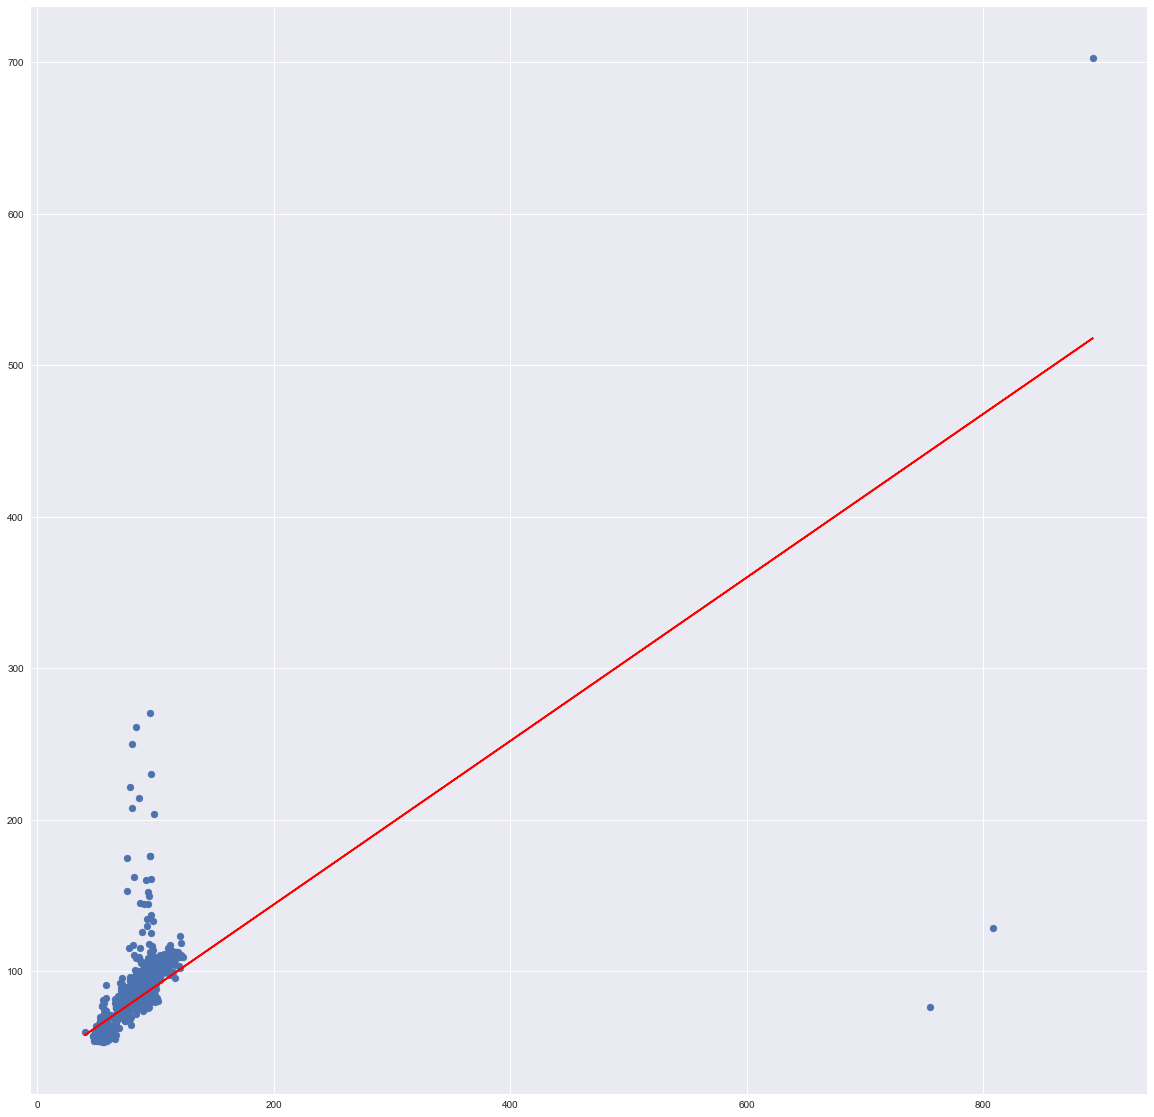

In [152]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 20, 20

# x = tips['Врем. сопротивление']
# y = tips['Предсказанное']
# fig, ax = plt.subplots()
# fit = np.polyfit(x, y, deg=1)
# ax.plot(x, fit[0] * x + fit[1], color='red')
# ax.scatter(x, y)

